# Manhattan's Airbnbs Analysis: Price per night and close venues


By Oscar Aguilar using the NYC 2019 Airbnb dataset from Kaggle and the Foursquare location data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import folium
from geopy.geocoders import Nominatim

Matplotlib is building the font cache using fc-list. This may take a moment.


In [36]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [37]:
# Inspect the type of each variable
print(df.dtypes)
print('--------')
# Check for missing values
print(df.isnull().sum())

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
--------
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                

In [38]:
# Dataset dimensions
df.shape

(48895, 16)

In [39]:
# Delete unnecesary columns for analysis and columns with tons of missing data
df.drop(['id','host_id','host_name','last_review','reviews_per_month','calculated_host_listings_count','availability_365'], axis=1, inplace=True)

In [40]:
# Since the dataset has almost 49k rows, the 16 listings without name will be deleted
df2 = df[df['name'].notnull()]
df2.shape

(48879, 9)

In [41]:
print(df2.neighbourhood_group.unique())
df2.groupby(['neighbourhood_group']).count()

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
neighbourhood_group,,,,,,,,
Bronx,1090,1090,1090,1090,1090,1090,1090,1090
Brooklyn,20098,20098,20098,20098,20098,20098,20098,20098
Manhattan,21652,21652,21652,21652,21652,21652,21652,21652
Queens,5666,5666,5666,5666,5666,5666,5666,5666
Staten Island,373,373,373,373,373,373,373,373


/Users/oscaraguilar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


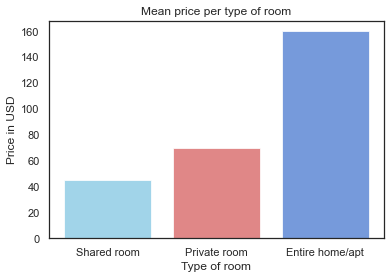

In [317]:
#Room_type - price
rt_p = df2.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
plt.bar(rt_p['room_type'], rt_p['price'], color='crb', alpha=0.75)
plt.title('Mean price per type of room')
plt.ylabel('Price in USD')
plt.xlabel('Type of room')
plt.show()

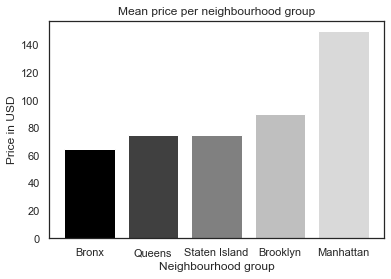

In [315]:
#Room_type - price
n_p = df2.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
plt.bar(n_p['neighbourhood_group'], n_p['price'], color=['0.0','0.25','0.5','0.75','0.85'])
plt.title('Mean price per neighbourhood group')
plt.ylabel('Price in USD')
plt.xlabel('Neighbourhood group')
plt.show()

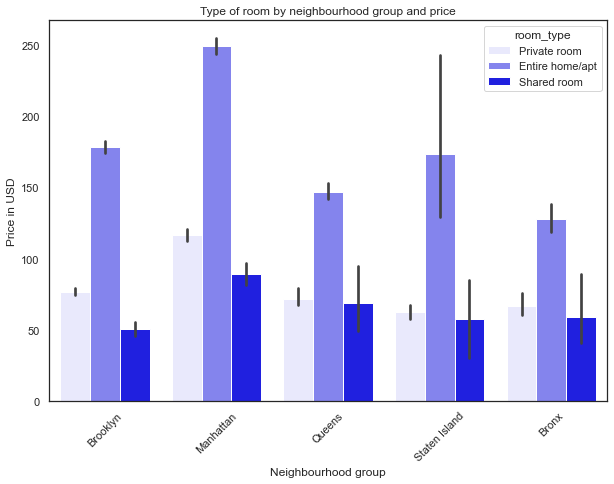

In [326]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", color='blue', hue = "room_type", data = df2)
plt.xticks(rotation=45)
plt.title('Type of room by neighbourhood group and price')
plt.ylabel('Price in USD')
plt.xlabel('Neighbourhood group')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


                       count        mean         std   min   25%    50%  \
neighbourhood_group                                                       
Bronx                 1090.0   87.457798  106.750555   0.0  45.0   65.0   
Brooklyn             20098.0  124.395711  186.898953   0.0  60.0   90.0   
Manhattan            21652.0  196.877425  291.435503   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0  


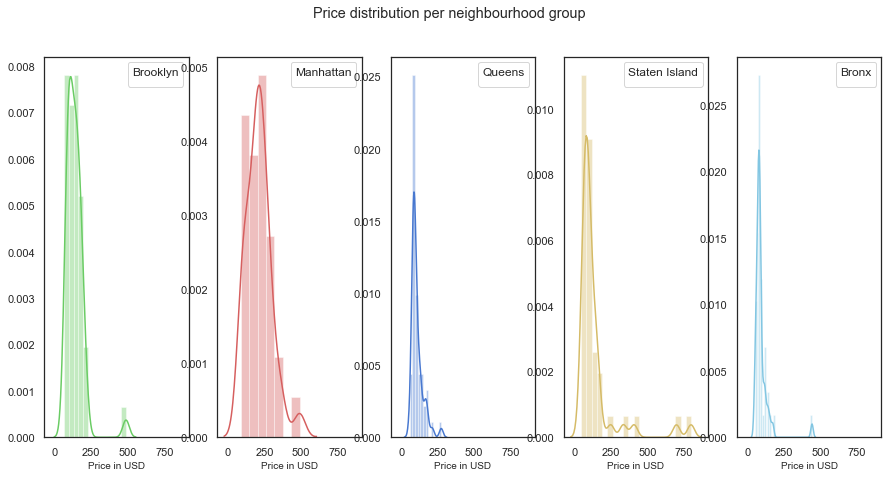

In [335]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(15, 7), sharex=True)


b = df2[df2.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
m = df2[df2.neighbourhood_group == "Manhattan"][["neighbourhood","price"]]
q = df2[df2.neighbourhood_group == "Queens"][["neighbourhood","price"]]
s = df2[df2.neighbourhood_group == "Staten Island"][["neighbourhood","price"]]
bx = df2[df2.neighbourhood_group == "Bronx"][["neighbourhood","price"]]

b2 = b.groupby("neighbourhood").mean()
m2 = m.groupby("neighbourhood").mean()
q2 = q.groupby("neighbourhood").mean()
s2 = s.groupby("neighbourhood").mean()
bx2 = bx.groupby("neighbourhood").mean()

sns.distplot(b2, color="g", ax=ax1)
sns.distplot(m2, color="r", ax=ax2)
sns.distplot(q2, color="b", ax=ax3)
sns.distplot(s2, color="y", ax=ax4)
sns.distplot(bx2, color="c", ax=ax5)

plt.suptitle('Price distribution per neighbourhood group')
ax1.legend(title='Brooklyn')
ax2.legend(title='Manhattan')
ax3.legend(title='Queens')
ax4.legend(title='Staten Island')
ax5.legend(title='Bronx')

ax1.set_xlabel('Price in USD', fontsize=10)
ax2.set_xlabel('Price in USD', fontsize=10)
ax3.set_xlabel('Price in USD', fontsize=10)
ax4.set_xlabel('Price in USD', fontsize=10)
ax5.set_xlabel('Price in USD', fontsize=10)

print(df2['price'].groupby(df2["neighbourhood_group"]).describe())

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


                   count        mean         std  min    25%    50%    75%  \
room_type                                                                    
Entire home/apt  25402.0  211.788048  284.076979  0.0  120.0  160.0  229.0   
Private room     22318.0   89.786630  160.232422  0.0   50.0   70.0   95.0   
Shared room       1159.0   70.075928  101.753942  0.0   33.0   45.0   75.0   

                     max  
room_type                 
Entire home/apt  10000.0  
Private room     10000.0  
Shared room       1800.0  


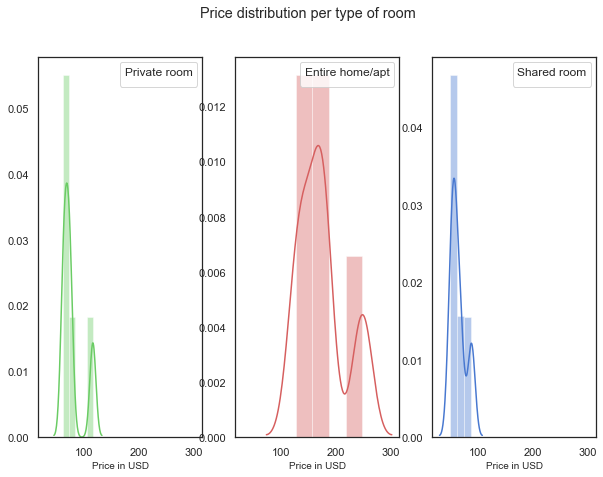

In [337]:
p = df2[df2.room_type == "Private room"][["neighbourhood_group","price"]]
e = df2[df2.room_type == "Entire home/apt"][["neighbourhood_group","price"]]
s = df2[df2.room_type == "Shared room"][["neighbourhood_group","price"]]

sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10, 7), sharex=True)


p = df2[df2.room_type == "Private room"][["neighbourhood_group","price"]]
e = df2[df2.room_type == "Entire home/apt"][["neighbourhood_group","price"]]
s = df2[df2.room_type == "Shared room"][["neighbourhood_group","price"]]

p2 = p.groupby("neighbourhood_group").mean()
e2 = e.groupby("neighbourhood_group").mean()
s2 = s.groupby("neighbourhood_group").mean()

sns.distplot(p2, color="g", ax=ax1)
sns.distplot(e2, color="r", ax=ax2)
sns.distplot(s2, color="b", ax=ax3)
ax1.set_xlabel('Price in USD', fontsize=10)
ax2.set_xlabel('Price in USD', fontsize=10)
ax3.set_xlabel('Price in USD', fontsize=10)

plt.suptitle('Price distribution per type of room')
ax1.legend(title='Private room')
ax2.legend(title='Entire home/apt')
ax3.legend(title='Shared room')
plt.xlabel('Price in USD')

print(df2['price'].groupby(df2["room_type"]).describe())

Text(0.5, 1.0, 'Number of listings classified by type and neighborhood group')

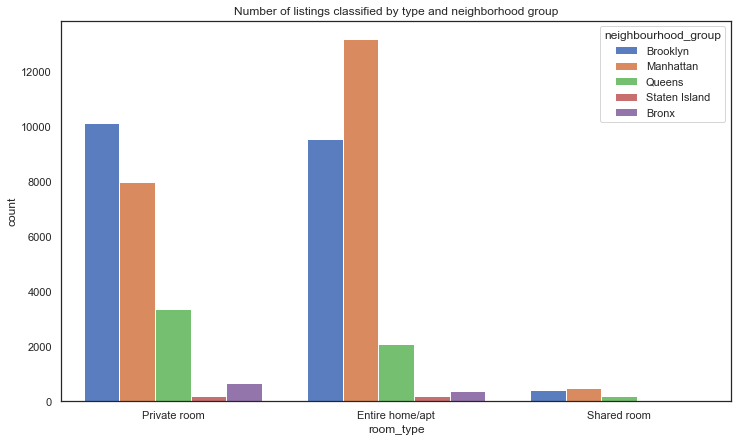

In [437]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df2['room_type'],hue=df2['neighbourhood_group'], palette='muted')
plt.title('Number of listings classified by type and neighborhood group')

In [218]:
si = df2.loc[df2['neighbourhood_group']=='Staten Island']

In [219]:
print(si.shape)

(373, 9)


In [220]:
si.drop(['neighbourhood_group'], axis=1, inplace=True)
si.reset_index(drop=True, inplace=True)
si.head(10)

/Users/oscaraguilar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
0,New York room with a view,St. George,40.64524,-74.08088,Private room,70,2,166
1,A SpeciaL!! Private Room in NY,Tompkinsville,40.63536,-74.08537,Private room,36,2,193
2,B NYC Staten Alternative...,Tompkinsville,40.63627,-74.08543,Private room,37,2,147
3,C Private Room By The Ferry,Tompkinsville,40.63518,-74.08546,Private room,37,2,177
4,D Private Che@p Room 2 Explore NYC,Tompkinsville,40.63481,-74.08519,Private room,36,2,333
5,New Clean Spacious Bed & Breakfast,Emerson Hill,40.60742,-74.14388,Private room,80,2,2
6,Sunny cozy multileveled apartment!,Shore Acres,40.61077,-74.06824,Entire home/apt,75,6,76
7,"Oceanview,close to Manhattan",Arrochar,40.59251,-74.06479,Entire home/apt,250,2,21
8,"Affordable rooms,all transportation",Arrochar,40.59101,-74.06685,Private room,50,7,0
9,"Budget stay, near transportation",Arrochar,40.59262,-74.06659,Entire home/apt,125,2,8


In [221]:
address = 'Staten Island, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.5834557, -74.1496048.


In [344]:
# ALL ROOMS IN STATEN ISLAND
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for name, lat, lng, nh in zip(si['name'],si['latitude'], si['longitude'], si['neighbourhood']):
    label = '{}, {}'.format(name, nh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [223]:
print(si.room_type.unique())
si.groupby(['room_type']).count()

['Private room' 'Entire home/apt' 'Shared room']


,name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews
room_type,,,,,,,
Entire home/apt,176,176,176,176,176,176,176
Private room,188,188,188,188,188,188,188
Shared room,9,9,9,9,9,9,9


In [224]:
si_e = si.loc[si['room_type']=='Entire home/apt']
si_p = si.loc[si['room_type']=='Private room']
si_s = si.loc[si['room_type']=='Shared room']

In [225]:
# ENTIRE HOMES/APTS
map_newyork2 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(si_e['latitude'], si_e['longitude'], si_e['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork2)  
    
map_newyork2

In [226]:
# Private room
map_newyork3 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(si_p['latitude'], si_p['longitude'], si_p['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork3)  
    
map_newyork3

In [228]:
# Shared rooms
map_newyork4 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(si_s['latitude'], si_s['longitude'], si_s['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork4)  
    
map_newyork4

In [243]:
print(si.neighbourhood.unique())
print(si.groupby(['neighbourhood']).count())

['St. George' 'Tompkinsville' 'Emerson Hill' 'Shore Acres' 'Arrochar'
 'Clifton' 'Graniteville' 'Stapleton' 'New Springville' 'Tottenville'
 'Mariners Harbor' 'Concord' 'Port Richmond' 'Woodrow' 'Eltingville'
 'Lighthouse Hill' 'West Brighton' 'Great Kills' 'Dongan Hills'
 'Castleton Corners' 'Randall Manor' 'Todt Hill' 'Silver Lake'
 'Grymes Hill' 'New Brighton' 'Midland Beach' 'Richmondtown'
 'Howland Hook' 'New Dorp Beach' "Prince's Bay" 'South Beach' 'Oakwood'
 'Huguenot' 'Grant City' 'Westerleigh' 'Bay Terrace, Staten Island'
 'Fort Wadsworth' 'Rosebank' 'Arden Heights' "Bull's Head" 'New Dorp'
 'Rossville' 'Willowbrook']
                            name  latitude  longitude  room_type  price  \
neighbourhood                                                             
Arden Heights                  4         4          4          4      4   
Arrochar                      21        21         21         21     21   
Bay Terrace, Staten Island     2         2          2          2 

In [244]:
si.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,40.610225,-74.105805,114.812332,4.831099,30.941019
std,0.032419,0.036400,277.620403,19.727605,44.830766
min,40.499790,-74.244420,13.000000,1.000000,0.000000
25%,40.593720,-74.123930,50.000000,1.000000,1.000000
50%,40.621540,-74.089300,75.000000,2.000000,12.000000
75%,40.634740,-74.081070,110.000000,3.000000,42.000000
max,40.647790,-74.060920,5000.000000,365.000000,333.000000


Text(0, 0.5, 'USD $')

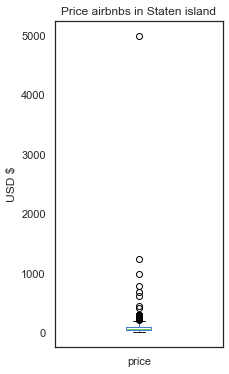

In [245]:
si_p = si.loc[:,'price']
si_p.plot(kind='box', figsize=(3, 6))
plt.title('Price airbnbs in Staten island')
plt.ylabel('USD $')


In [248]:
si.loc[si.price==5000]

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
125,Victorian Film location,Randall Manor,40.63952,-74.0973,Entire home/apt,5000,1,0


In [250]:
si.loc[si.neighbourhood=='St. George']

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
0,New York room with a view,St. George,40.64524,-74.08088,Private room,70,2,166
22,Private studio in staten island \n\n,St. George,40.64699,-74.08151,Entire home/apt,190,2,0
28,New York City near Staten Is. Ferry,St. George,40.64270,-74.08001,Private room,95,2,234
29,Beautiful turn-of-the-century home,St. George,40.64444,-74.08302,Entire home/apt,175,3,22
30,Four-Bedroom Victorian Near Ferry,St. George,40.64553,-74.08323,Entire home/apt,195,3,105
32,*WARM*Beautiful*Room*ST. GEORGE steps to ferry!,St. George,40.64408,-74.07834,Private room,58,3,93
37,Victorian with Stunning Views of NYC Harbor,St. George,40.64571,-74.07835,Entire home/apt,1000,1,0
43,1-BdRm Entire Apartment St. George,St. George,40.64567,-74.08368,Entire home/apt,60,4,118
45,2-Bdrm Entire Apartment St. George,St. George,40.64524,-74.08326,Entire home/apt,89,4,129
55,Magnolia House Saint George,St. George,40.64779,-74.08460,Entire home/apt,144,1,105


In [251]:
CLIENT_ID = 'AU5TJYOK4KJX3O0OSHQQLDC53IN0BY2RRVVZUKLRFZB3XEFQ' # your Foursquare ID
CLIENT_SECRET = 'YIRWJ40DDEJ2XMK4DKZJOQCB0GS5BWGABIGZ3JSJ0DPQQPB3' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

neighborhood_latitude = 40.643
neighborhood_longitude = -74.099 # neighborhood longitude value

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
print(url) 
results = requests.get(url).json()
results

Your credentails:
CLIENT_ID: AU5TJYOK4KJX3O0OSHQQLDC53IN0BY2RRVVZUKLRFZB3XEFQ
CLIENT_SECRET:YIRWJ40DDEJ2XMK4DKZJOQCB0GS5BWGABIGZ3JSJ0DPQQPB3
https://api.foursquare.com/v2/venues/explore?&client_id=AU5TJYOK4KJX3O0OSHQQLDC53IN0BY2RRVVZUKLRFZB3XEFQ&client_secret=YIRWJ40DDEJ2XMK4DKZJOQCB0GS5BWGABIGZ3JSJ0DPQQPB3&v=20180604&ll=40.643,-74.099&radius=500&limit=100


{'meta': {'code': 200, 'requestId': '5f0793f3427a8e08cf11fd02'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.6475000045, 'lng': -74.09308051538576},
   'sw': {'lat': 40.6384999955, 'lng': -74.10491948461424}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b65d44df964a5207d022be3',
       'name': 'Snug Harbor Cultural Center & Botanical Garden',
       'location': {'address': '1000 Richmond Ter',
        'crossStreet': 'Snug Harbor Rd',
        'lat': 40.643738002649215,
        'lng': -74.10233259201048,
       

In [252]:
#Function to get the category of the venues 
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [253]:
#Additional imports
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
nearby_venues.head(11)

25 venues were returned by Foursquare.


/Users/oscaraguilar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Snug Harbor Cultural Center & Botanical Garden,Cultural Center,40.643738,-74.102333
1,Staten Island Children's Museum,Museum,40.642736,-74.101632
2,Crispy Pizza,Fast Food Restaurant,40.644579,-74.098401
3,Snug Harbor Music Hall,Concert Hall,40.643637,-74.101258
4,Liedy's Shore Inn,Bar,40.644704,-74.097121
5,Chinese Scholars' Garden,Garden,40.642161,-74.104304
6,Snug Harbor Herb Garden,Botanical Garden,40.642610,-74.103350
7,Staten Island Museum at Snug Harbor,Museum,40.644524,-74.102822
8,Adobe Blues,Mexican Restaurant,40.643270,-74.095441
9,Dunkin',Donut Shop,40.644544,-74.095545


In [265]:
#Function to repeat the anayliss with all the neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500): 
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [266]:
staten_venues = getNearbyVenues(names=si['neighbourhood'],
                                   latitudes=si['latitude'],
                                   longitudes=si['longitude']
                                  )

St. George
Tompkinsville
Tompkinsville
Tompkinsville
Tompkinsville
Emerson Hill
Shore Acres
Arrochar
Arrochar
Arrochar
Clifton
Graniteville
Stapleton
New Springville
Tottenville
Tompkinsville
Mariners Harbor
Concord
Concord
Arrochar
Tompkinsville
Port Richmond
St. George
Port Richmond
Shore Acres
Woodrow
Concord
Clifton
St. George
St. George
St. George
Eltingville
St. George
Clifton
Stapleton
Lighthouse Hill
Tompkinsville
St. George
West Brighton
Stapleton
Mariners Harbor
Tompkinsville
Great Kills
St. George
West Brighton
St. George
Tompkinsville
Dongan Hills
Tompkinsville
Castleton Corners
Randall Manor
Todt Hill
Great Kills
Silver Lake
Tompkinsville
St. George
Randall Manor
Concord
Shore Acres
Grymes Hill
Stapleton
Tompkinsville
Stapleton
Castleton Corners
New Brighton
Concord
Midland Beach
Tottenville
Clifton
Tottenville
Clifton
St. George
Richmondtown
Tompkinsville
Concord
Tompkinsville
Tompkinsville
Howland Hook
Clifton
St. George
New Dorp Beach
Howland Hook
Prince's Bay
Tottenvil

In [267]:
print(staten_venues.shape)
staten_venues.head()

(5663, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.64524,-74.08088,Beso,40.643306,-74.076508,Tapas Restaurant
1,St. George,40.64524,-74.08088,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
2,St. George,40.64524,-74.08088,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
3,St. George,40.64524,-74.08088,A&S Pizzeria,40.643940,-74.077626,Pizza Place
4,St. George,40.64524,-74.08088,St. George Theatre,40.642253,-74.077496,Theater


In [268]:
print('There are {} uniques categories.'.format(len(staten_venues['Venue Category'].unique())))
print('Count of each type of category per neighborhood')
staten_venues.groupby('Neighborhood').count()

There are 219 uniques categories.
Count of each type of category per neighborhood


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arden Heights,31,31,31,31,31,31
Arrochar,360,360,360,360,360,360
"Bay Terrace, Staten Island",24,24,24,24,24,24
Bull's Head,77,77,77,77,77,77
Castleton Corners,67,67,67,67,67,67
Clifton,134,134,134,134,134,134
Concord,399,399,399,399,399,399
Dongan Hills,79,79,79,79,79,79
Eltingville,76,76,76,76,76,76


In [269]:
# One hot encoding
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
staten_onehot['Neighborhood'] = staten_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]
staten_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
#Nieghborhood and the top 3 categories of venue
staten_grouped = staten_onehot.groupby('Neighborhood').mean().reset_index()
num_top_venues = 3
for hood in staten_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = staten_grouped[staten_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arden Heights----
              venue  freq
0          Bus Stop  0.10
1  Asian Restaurant  0.10
2        Restaurant  0.06


----Arrochar----
                venue  freq
0  Italian Restaurant  0.07
1      Baseball Field  0.06
2        Liquor Store  0.06


----Bay Terrace, Staten Island----
                venue  freq
0  Italian Restaurant  0.21
1    Insurance Office  0.08
2         Supermarket  0.08


----Bull's Head----
                     venue  freq
0              Pizza Place  0.09
1              Coffee Shop  0.08
2  Health & Beauty Service  0.08


----Castleton Corners----
            venue  freq
0     Pizza Place  0.10
1            Bank  0.07
2  Ice Cream Shop  0.04


----Clifton----
            venue  freq
0  Sandwich Place  0.13
1     Pizza Place  0.10
2        Bus Stop  0.09


----Concord----
                venue  freq
0  Italian Restaurant  0.09
1       Deli / Bodega  0.08
2            Bus Stop  0.07


----Dongan Hills----
                venue  freq
0                Lake

In [296]:
#Dataframe of neighborhoods plus the top 10 categories of venue
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = staten_grouped['Neighborhood']

for ind in np.arange(staten_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arden Heights,Bus Stop,Asian Restaurant,Park,Diner,Chinese Restaurant,Restaurant,Pizza Place,Pub,Pool,Liquor Store
1,Arrochar,Italian Restaurant,Pharmacy,Baseball Field,Liquor Store,Deli / Bodega,Bakery,Beach,Pizza Place,Sandwich Place,Grocery Store
2,"Bay Terrace, Staten Island",Italian Restaurant,Insurance Office,Supermarket,Plaza,Bar,Pizza Place,Playground,Chinese Restaurant,Donut Shop,Salon / Barbershop
3,Bull's Head,Pizza Place,Health & Beauty Service,Coffee Shop,Chinese Restaurant,Food,Bagel Shop,Spa,Sandwich Place,Baseball Field,Pharmacy
4,Castleton Corners,Pizza Place,Bank,Chinese Restaurant,Ice Cream Shop,Diner,Optical Shop,Mini Golf,Sandwich Place,Bus Stop,Flower Shop


In [302]:
names=neighborhoods_venues_sorted['1st Most Common Venue'].unique()
names

array(['Bus Stop', 'Italian Restaurant', 'Pizza Place', 'Sandwich Place',
       'Lake', 'Chinese Restaurant', 'Fast Food Restaurant',
       'Convenience Store', 'Hardware Store', 'Sports Bar', 'Lighthouse',
       'Deli / Bodega', 'Clothing Store', 'Baseball Field',
       'American Restaurant', 'Ice Cream Shop', 'Salon / Barbershop',
       'Home Service'], dtype=object)

In [299]:
neighborhoods_venues_sorted.groupby(['1st Most Common Venue']).count()
y=[1,1,7,1,1,2,3,1,1,1,1,10,1,1,8,1,1,1]

In [388]:
color=np.array(y)
c=[]
for i in range(0,len(color)):
    if color[i]>4:
        c.append('green')
    else:
        c.append('yellow')
c


    

['yellow',
 'yellow',
 'green',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'green',
 'yellow',
 'yellow',
 'green',
 'yellow',
 'yellow',
 'yellow']

Text(0.5, 1.0, 'Most common categories of venues in Staten Island')

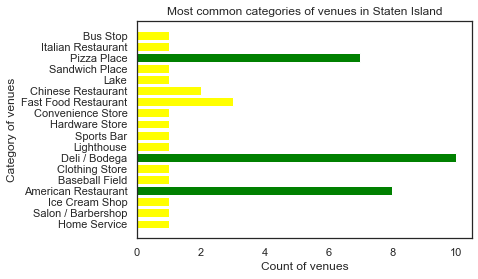

In [438]:
fig, ax = plt.subplots()

ax.barh(names, y, align='center', color=c)
y_pos=np.arange(len(names))
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count of venues')
ax.set_ylabel('Category of venues')
ax.set_title('Most common categories of venues in Staten Island')

In [393]:
si_onehot = pd.get_dummies(si[['price']],prefix="", prefix_sep="")
si_onehot['neighbourhood']=si['neighbourhood']
fixed_columns = [si_onehot.columns[-1]] + list(si_onehot.columns[:-1])
si_grouped = si_onehot.groupby('neighbourhood').mean().reset_index()
si_grouped.head(20)


,neighbourhood,price
0,Arden Heights,67.250000
1,Arrochar,115.000000
2,"Bay Terrace, Staten Island",102.500000
3,Bull's Head,47.333333
4,Castleton Corners,139.750000
5,Clifton,84.933333
6,Concord,58.192308
7,Dongan Hills,79.428571
8,Eltingville,141.666667
9,Emerson Hill,68.200000


In [394]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [395]:
si_clustering = si_grouped.drop('neighbourhood',1)
si_clustering.head()

,price
0,67.250000
1,115.000000
2,102.500000
3,47.333333
4,139.750000


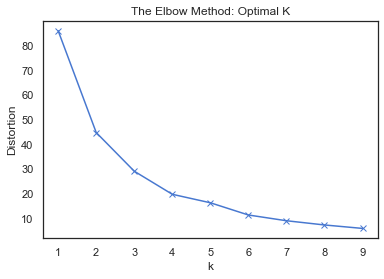

In [396]:
K = range(1,10)
distortions = []
for k in K:
    kmeans = KMeans(init = 'k-means++', n_clusters = k, n_init = 12, random_state = 0)
    kmeans.fit(si_clustering.values.reshape(-1,1))
    distortions.append(sum(np.min(cdist(si_clustering.values.reshape(-1, 1),kmeans.cluster_centers_, 'euclidean'), axis = 1)) / si_clustering.shape [0])

import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method: Optimal K')
plt.show() 

In [430]:
num_clusters = 6
kmeans = KMeans(n_clusters = num_clusters, random_state = 0).fit(si_clustering)
kmeans.labels_

array([5, 3, 3, 5, 0, 5, 5, 5, 0, 5, 1, 5, 5, 3, 0, 3, 3, 0, 3, 3, 3, 5,
       5, 5, 5, 3, 2, 2, 5, 3, 5, 0, 5, 3, 3, 3, 0, 5, 0, 5, 5, 4, 1],
      dtype=int32)

In [431]:
si_grouped.drop(['Cluster'],axis=1, inplace=True)
si_grouped.insert(0, 'Cluster', kmeans.labels_)
si_grouped.head(5)

,Cluster,neighbourhood,price
0,5,Arden Heights,67.250000
1,3,Arrochar,115.000000
2,3,"Bay Terrace, Staten Island",102.500000
3,5,Bull's Head,47.333333
4,0,Castleton Corners,139.750000


In [432]:
si_co = si.copy()
si_co.drop_duplicates(subset = ['neighbourhood'])
drop_element = 'price'
si_co.drop(drop_element, axis = 1)
si_co.head()

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
0,New York room with a view,St. George,40.64524,-74.08088,Private room,70,2,166
1,A SpeciaL!! Private Room in NY,Tompkinsville,40.63536,-74.08537,Private room,36,2,193
2,B NYC Staten Alternative...,Tompkinsville,40.63627,-74.08543,Private room,37,2,147
3,C Private Room By The Ferry,Tompkinsville,40.63518,-74.08546,Private room,37,2,177
4,D Private Che@p Room 2 Explore NYC,Tompkinsville,40.63481,-74.08519,Private room,36,2,333


In [433]:
si_merge = pd.merge(si_co, si_grouped[['Cluster','neighbourhood','price']],on = 'neighbourhood')
si_merge.head()

,name,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights,number_of_reviews,Cluster,price_y
0,New York room with a view,St. George,40.64524,-74.08088,Private room,70,2,166,3,118.145833
1,Private studio in staten island \n\n,St. George,40.64699,-74.08151,Entire home/apt,190,2,0,3,118.145833
2,New York City near Staten Is. Ferry,St. George,40.64270,-74.08001,Private room,95,2,234,3,118.145833
3,Beautiful turn-of-the-century home,St. George,40.64444,-74.08302,Entire home/apt,175,3,22,3,118.145833
4,Four-Bedroom Victorian Near Ferry,St. George,40.64553,-74.08323,Entire home/apt,195,3,105,3,118.145833


In [434]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [435]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_cluster = folium.Map(location=[latitude, longitude], zoom_start=10)

# Set color for clusters
x = np.arange(num_clusters)
ys = [i + x +(i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Set the marker for the map
markers_colors = []
for lat, lng, cluster in zip(si_merge['latitude'], si_merge['longitude'], si_merge['Cluster']):
  label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
  folium.CircleMarker([lat, lng],
                      radius=2,
                      popup=label,
                      color=rainbow[cluster-1],
                      fill=True,
                      fill_color=rainbow[cluster-1],
                      fill_opacity=0.7).add_to(map_cluster)
embed_map(map_cluster, 'map_cluster.html')

In [436]:
cluster_1 = si_merge.loc[si_merge['Cluster'] == 0]
cluster_2 = si_merge.loc[si_merge['Cluster'] == 1]
cluster_3 = si_merge.loc[si_merge['Cluster'] == 2]
cluster_4 = si_merge.loc[si_merge['Cluster'] == 3]
cluster_5 = si_merge.loc[si_merge['Cluster'] == 4]
cluster_6 = si_merge.loc[si_merge['Cluster'] == 5]


print('The mean price of cluster 1 is: ',cluster_1.price_x.mean())
print('The mean price of cluster 2 is: ',cluster_2.price_x.mean())
print('The mean price of cluster 3 is: ',cluster_3.price_x.mean())
print('The mean price of cluster 4 is: ',cluster_4.price_x.mean())
print('The mean price of cluster 5 is: ',cluster_5.price_x.mean())
print('The mean price of cluster 6 is: ',cluster_6.price_x.mean())




The mean price of cluster 1 is:  152.11764705882354
The mean price of cluster 2 is:  750.0
The mean price of cluster 3 is:  348.7826086956522
The mean price of cluster 4 is:  106.72435897435898
The mean price of cluster 5 is:  249.0
The mean price of cluster 6 is:  71.54777070063695
